#### Overview
Employee attrition is a critical challenge for organizations, impacting both finances and productivity. In this project, we aim to predict employee attrition using machine learning models to provide insights for Human Resources.

#### Understanding the Problem Statement

##### Why Predict Employee Attrition
- Retaining employees is essential to reduce costs and maintain organizational stability.
- The cost of hiring and training a new employee can range from **15%-20% of the annual salary**.
- By identifying at-risk employees, HR can proactively address potential attrition.

##### Business Impacts of Attrition
- Improve workforce stability.
- Optimize recruitment strategies.
- Enhance employee satisfaction through targeted interventions.


#### Data Setup and Import

In [ ]:
import pandas as pd               # used for data manipulation and analysis, especially working with tabular data (DataFrames)
import numpy as np                # used for numerical operations on arrays, such as mathematical and statistical functions
import seaborn as sns             # used for creating beautiful and informative statistical visualizations
import matplotlib.pyplot as plt   # used for creating basic to complex static, animated, and interactive plots

In [ ]:
# !pip install jupyterthemes
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
data = pd.read_csv("Dataset_EmployeeAttritionPrediction.csv")
employee_df = data

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Exploratory Data Analysis (EDA)
1. Data Overview

In [ ]:
##### Dimensions and summary information about the DataFrame (data types, non-null counts, memory usage)
employee_df.shape
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
##### Statistics summary for numerical columns
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
##### Categorize the features depending on their datatype (int, float, object)
##### Calculate the number of them
obj_ = (employee_df.dtypes == 'object')
obj_cols = list(obj_[obj_].index)
print("Categorical variables:",len(obj_cols))
print(obj_cols)

int_ = (employee_df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

flt_ = (employee_df.dtypes == 'float')
flt_cols = list(flt_[flt_].index)
print("Float variables:",len(flt_cols))

Categorical variables: 9
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Integer variables: 26
Float variables: 0


In [ ]:
##### Replace the 'Attritition', 'overtime', and 'Over18' column with integers (Yes = 1 and No = 0)
##### The word lambda is a way to create a small function (a mini-program) without giving it a name
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x=='Yes' else 0)
employee_df['Over18'] = employee_df['Attrition'].apply(lambda x:1 if x=='Y' else 0)

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


2. Features Distribution

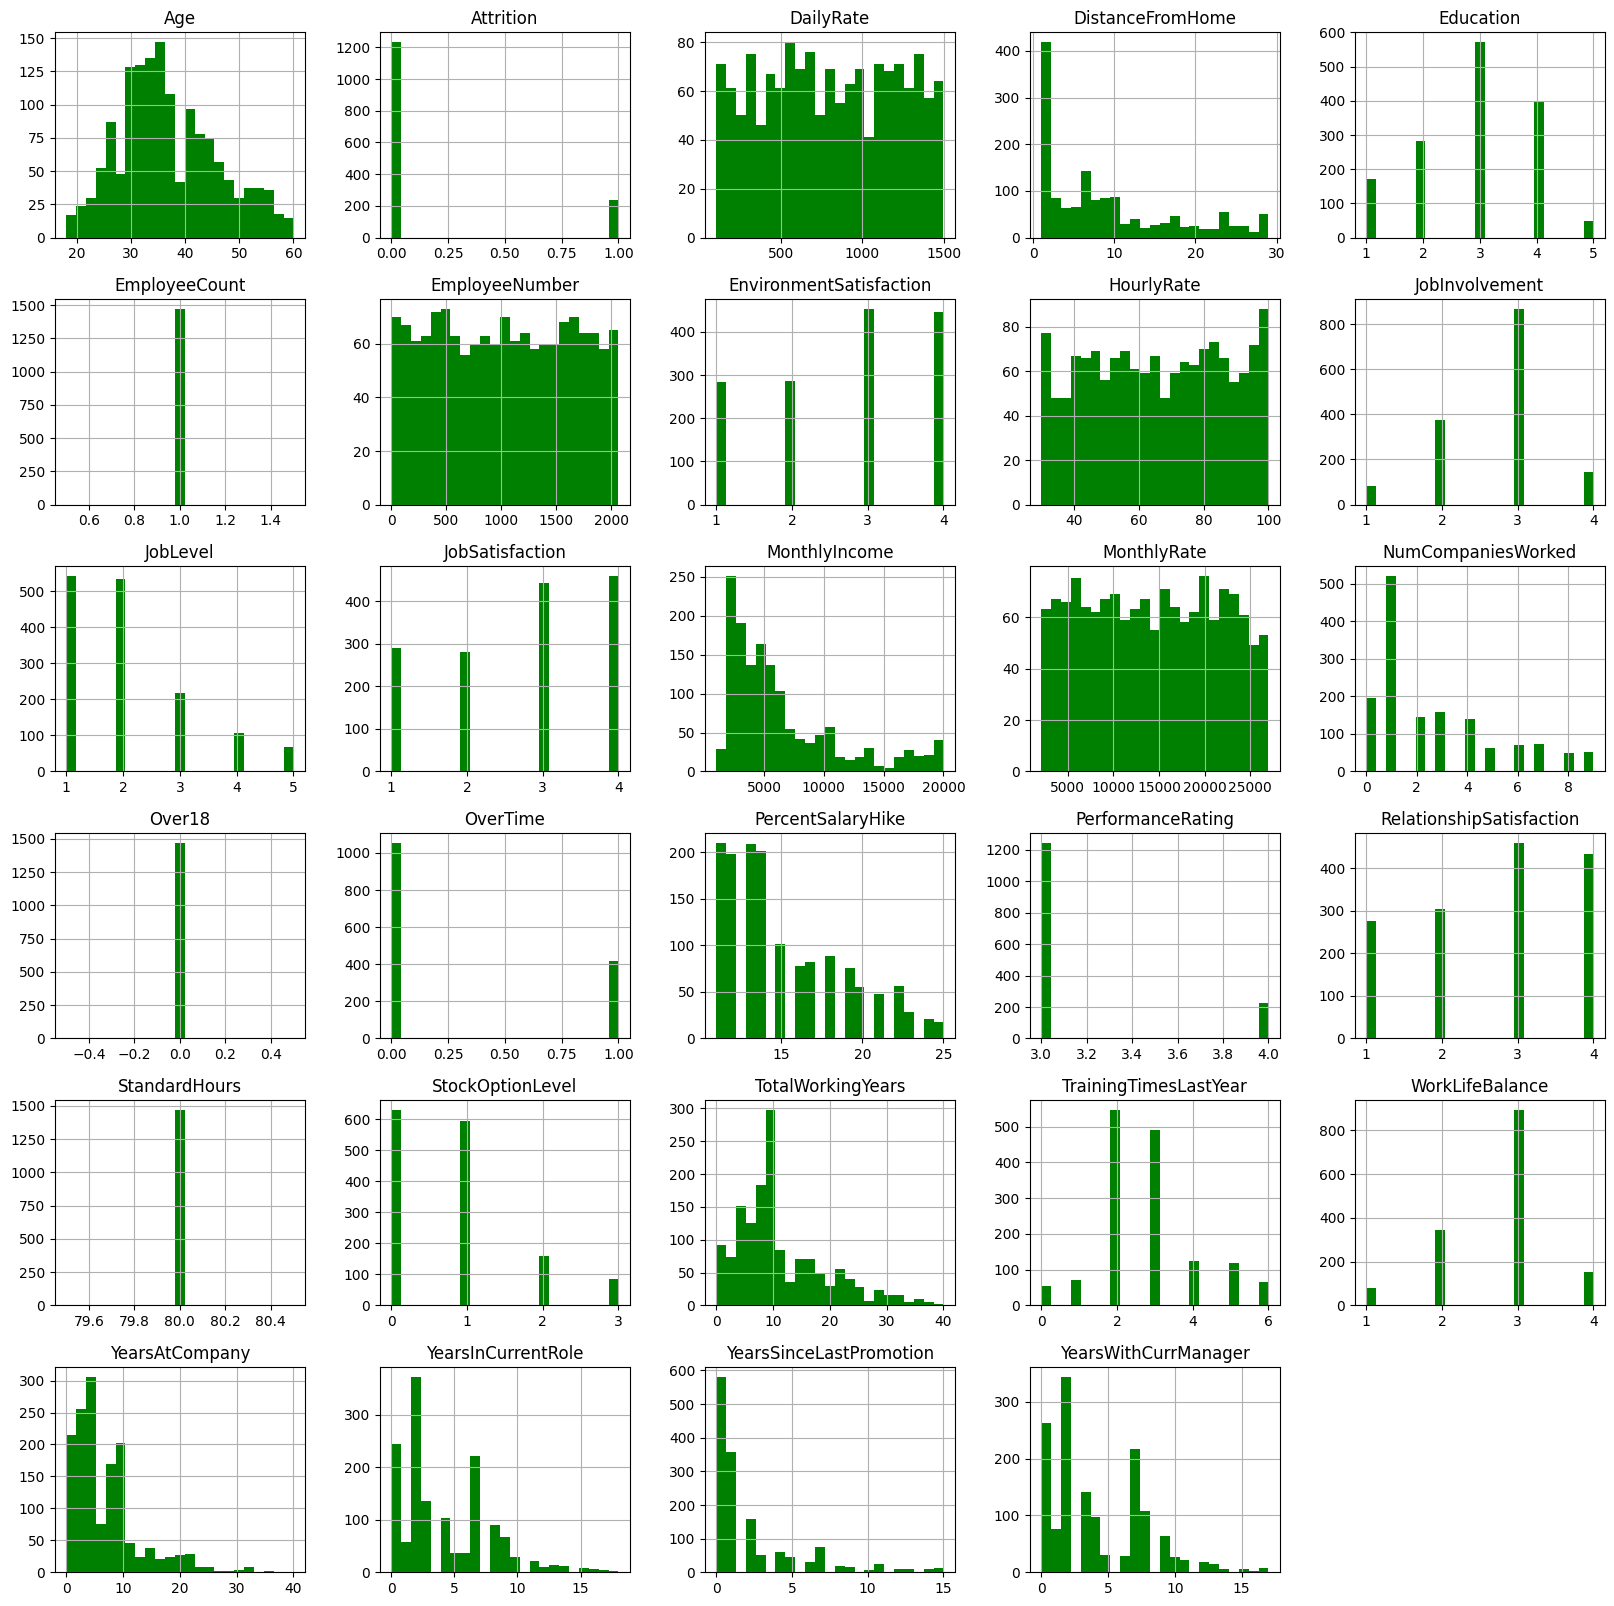

In [ ]:
##### Generate histograms for all numeric columns
employee_df.hist(bins=23, figsize=(20,20), color='g')
plt.show()

- *Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy.*
- *It makes sense to drop 'EmployeeCount' and 'StandardHours', 'Over18' since they do not change from one employee to the other.*
- *'EmployeeNumber'also doesn’t carry any meaningful information for predictions so can drop after checking count of distinct value for the column.*

In [ ]:
##### Check the number of distinct values in the 'EmployeeNumber' column
# distinct_count = employee_df['EmployeeNumber'].nunique()
# print(f"Number of distinct values in 'EmployeeNumber': {distinct_count}")

In [ ]:
#####  Drop 'EmployeeCount', 'Standardhours', 'Over18' & 'EmployeeNumber"
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


3. Correlation Analysis

<Axes: >

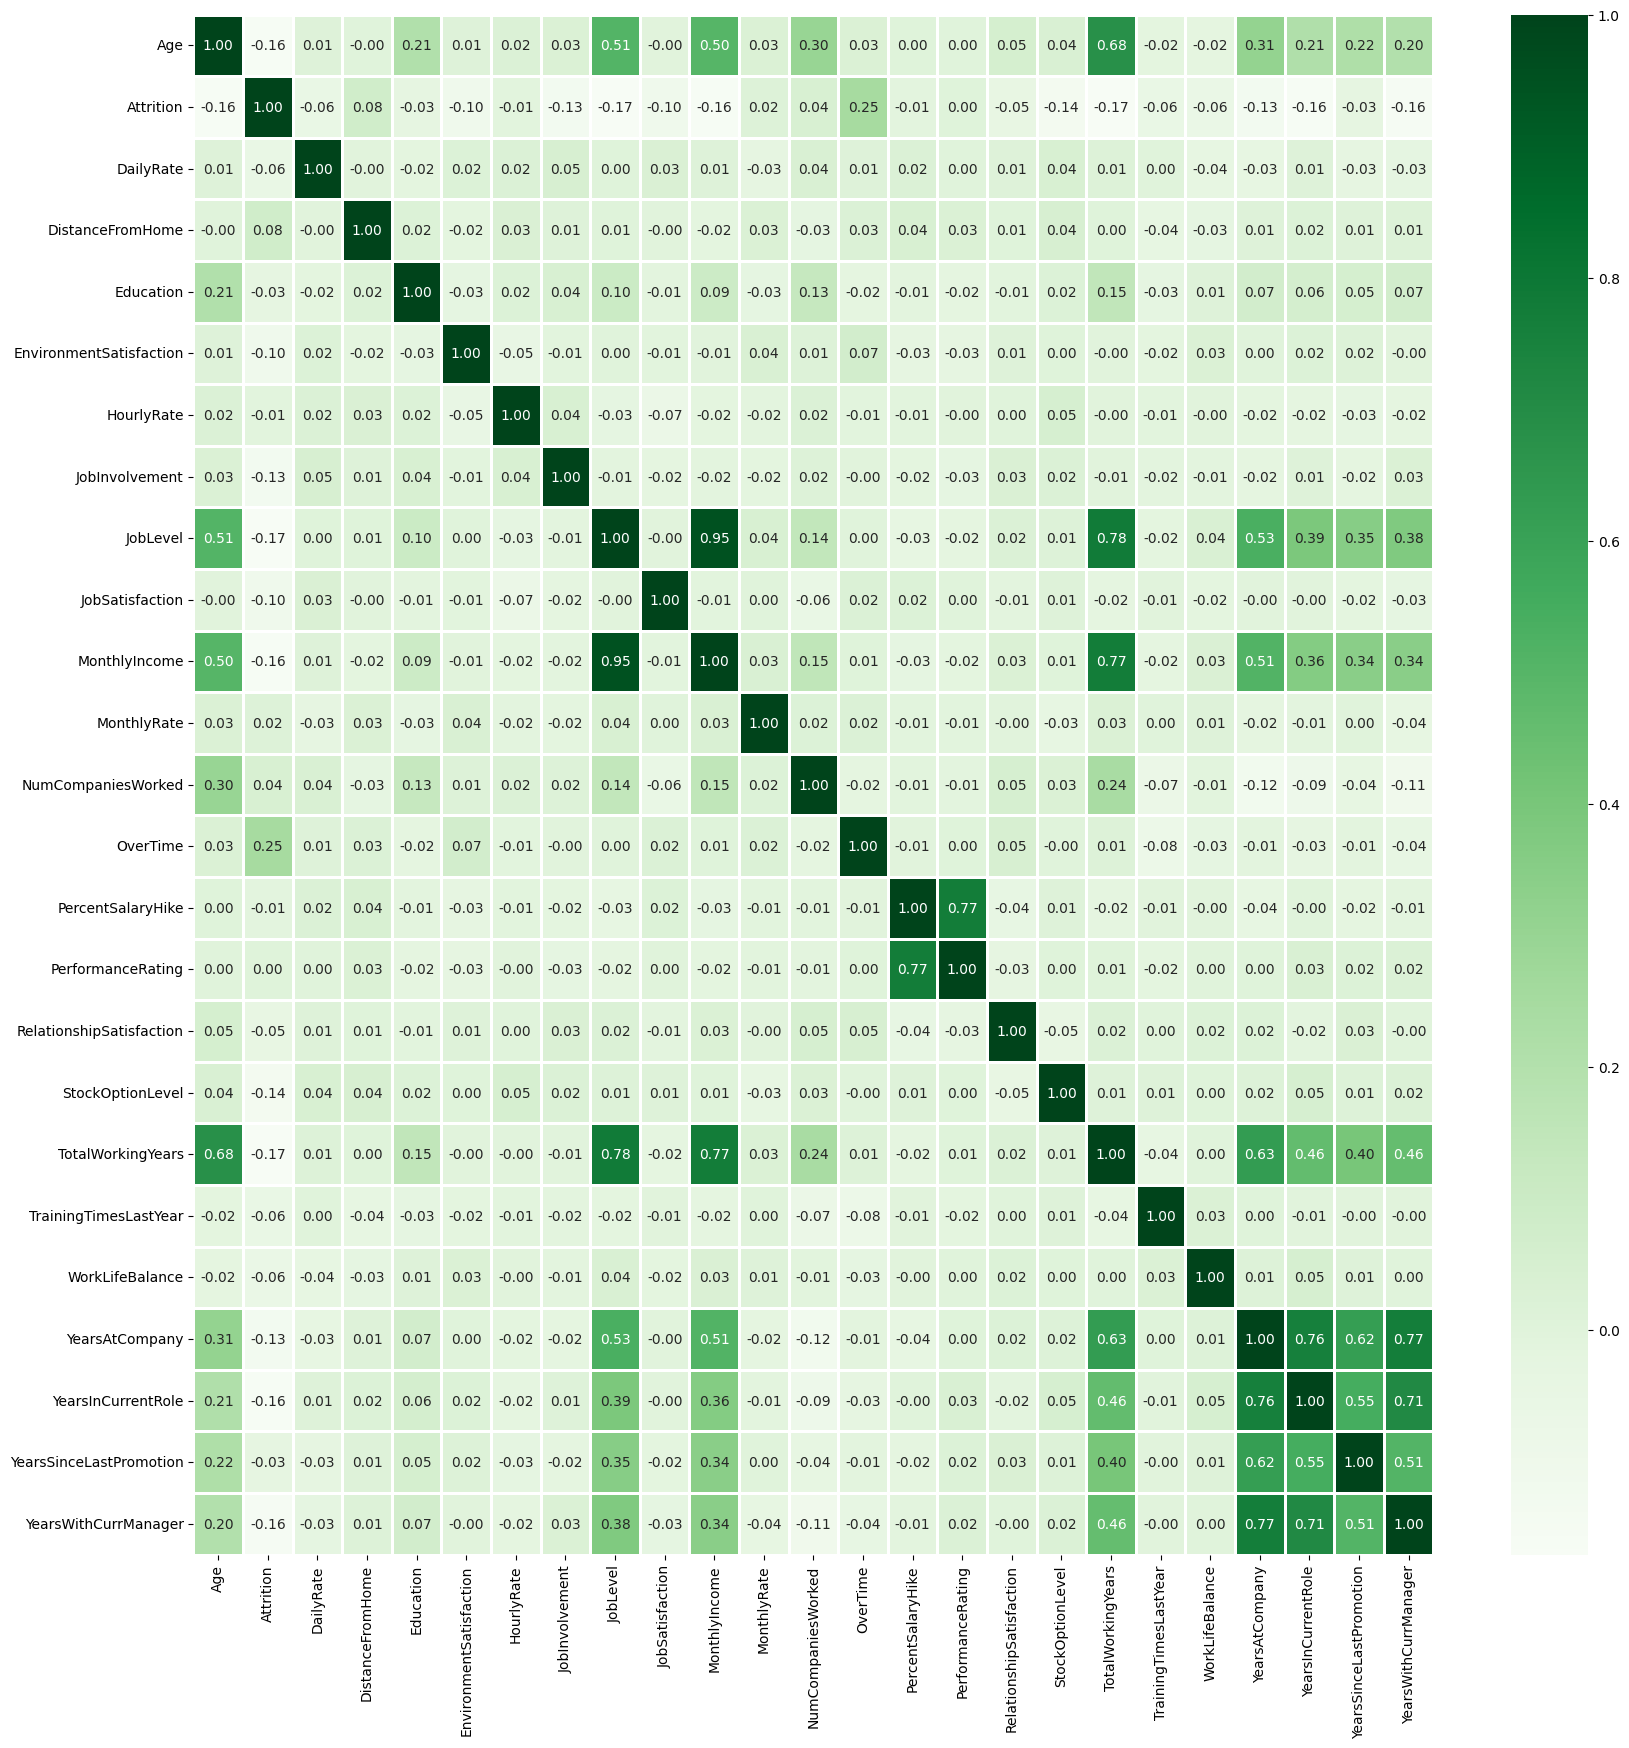

In [ ]:
##### Plot the correlation matrix
numerical_df = employee_df.select_dtypes(include=['number'])

plt.figure(figsize=(20,20))
sns.heatmap(numerical_df.corr(), cmap = 'Greens', fmt = '.2f', linewidths = 2, annot = True)

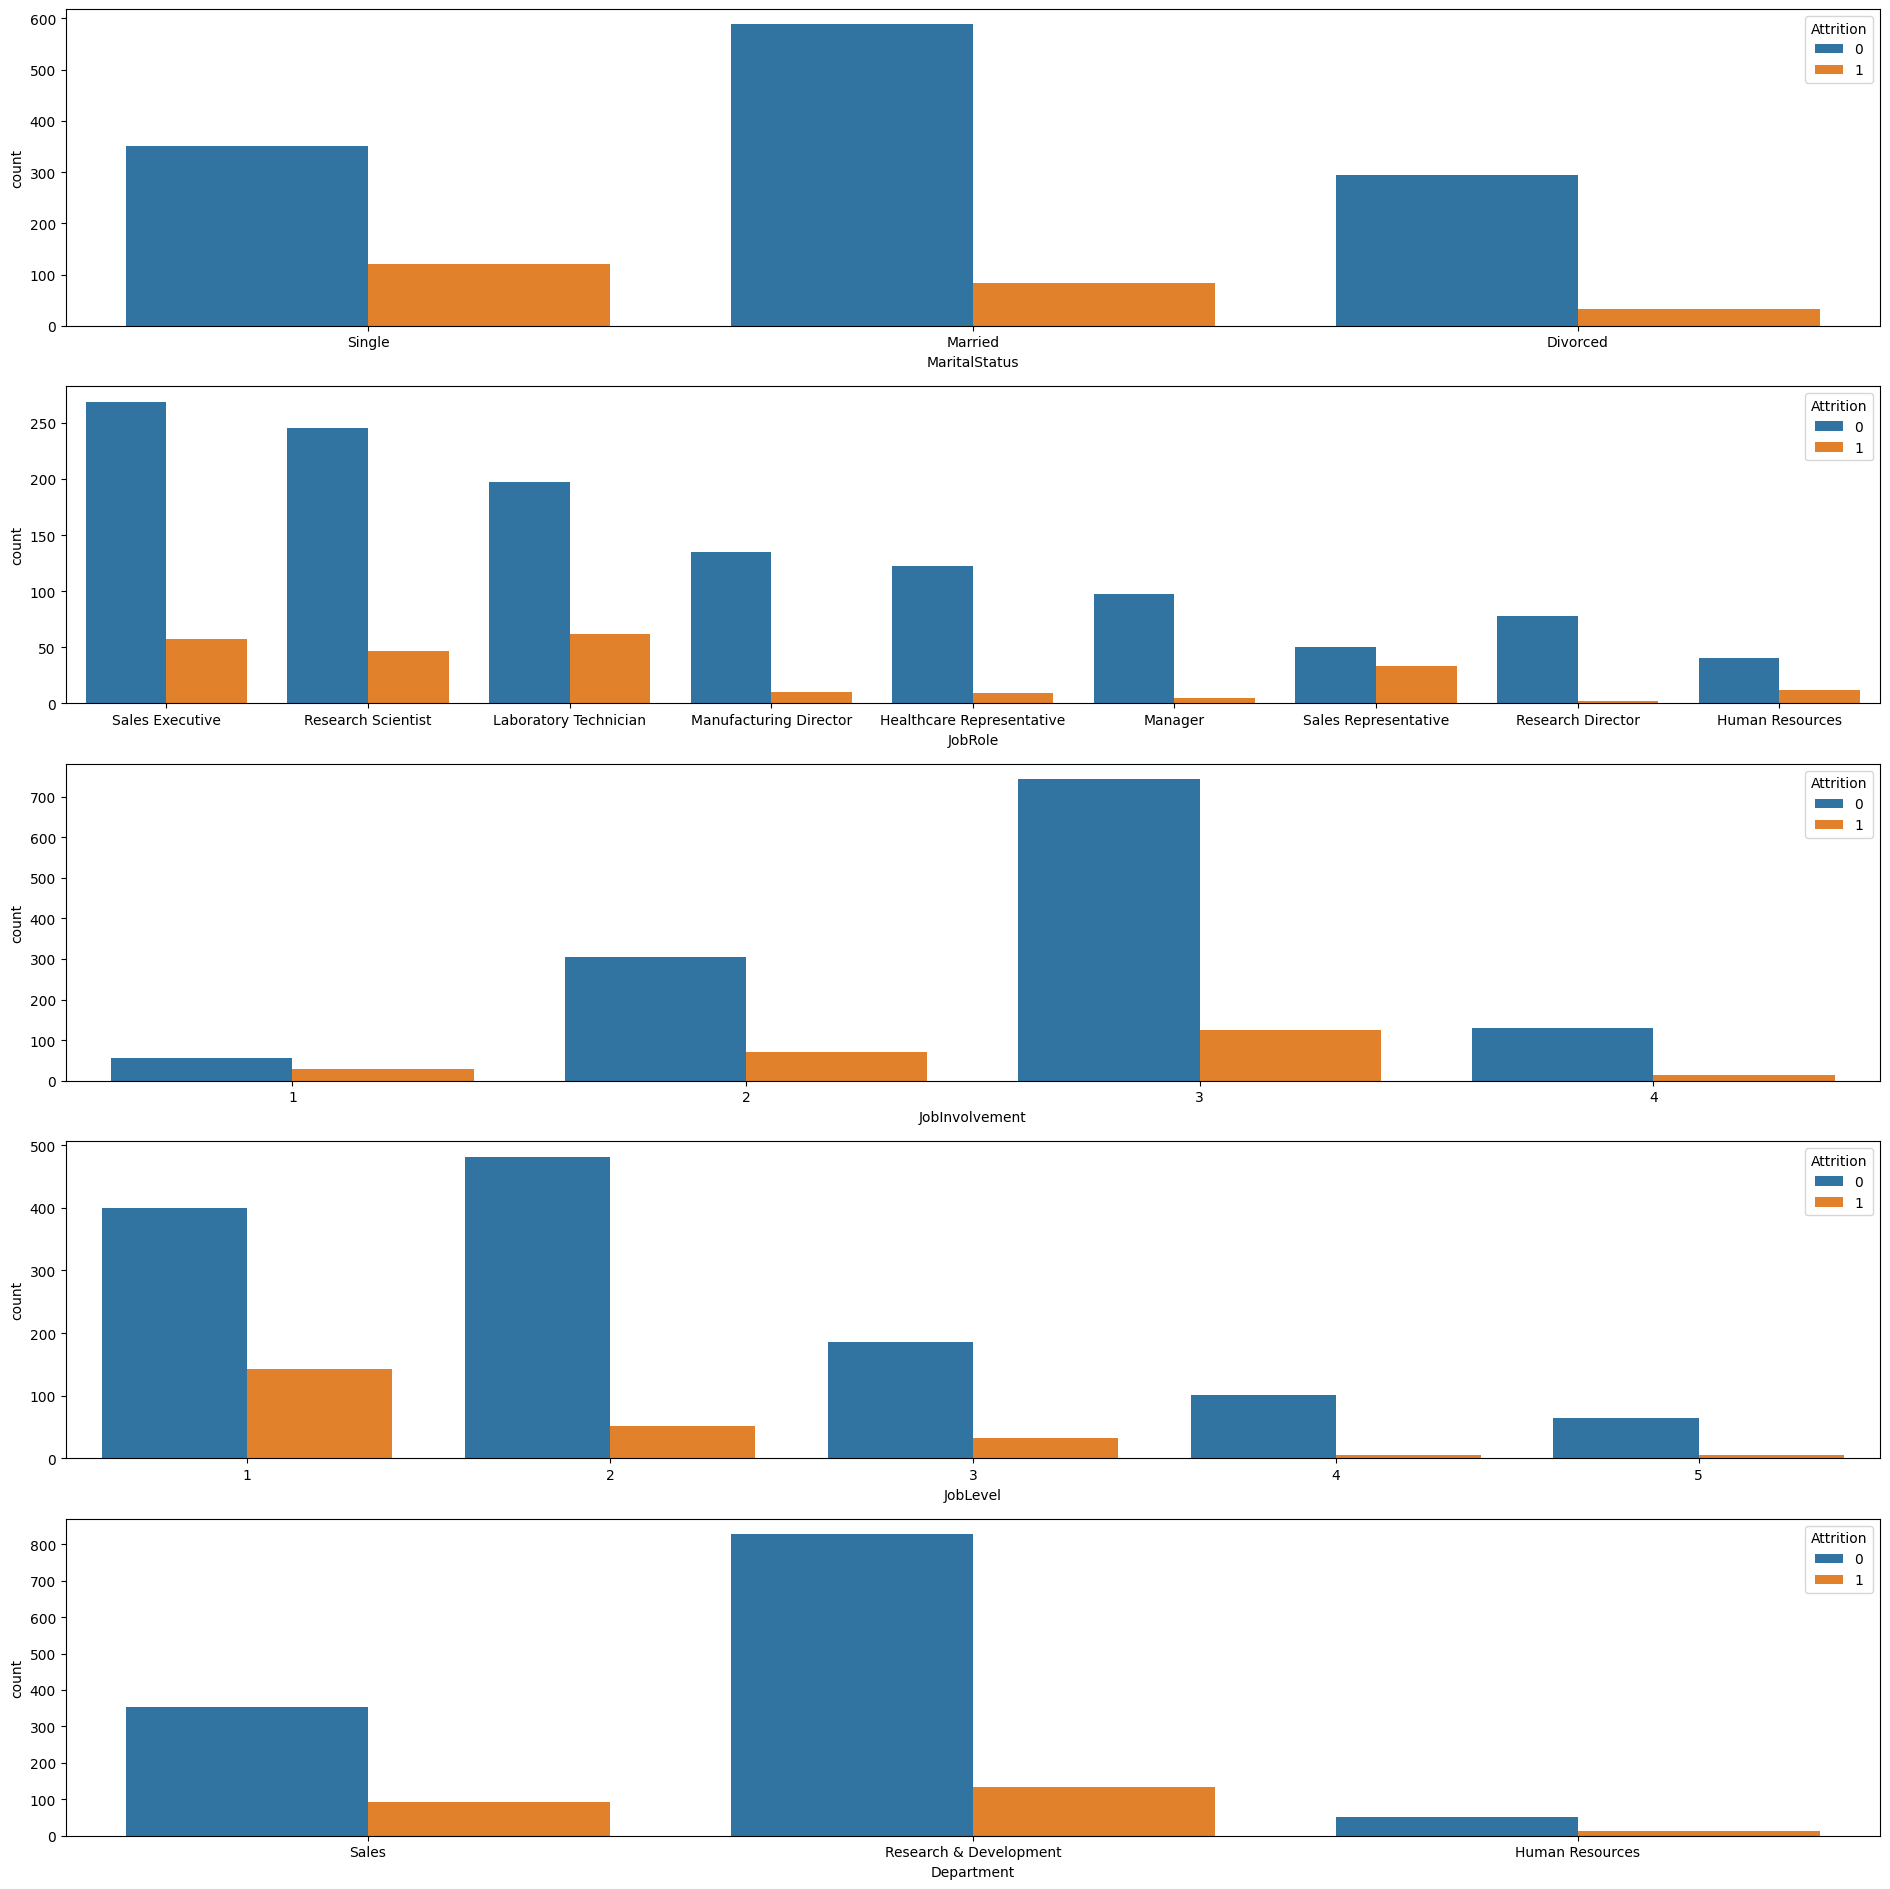

In [ ]:
##### Plot the countplot MaritalStatus, JobRole, JobInvolvement, JobLevel, MaritalStatus
plt.figure(figsize=(19, 19))

plt.subplot(511)                                                                # 511 means 1st of 5 plots
sns.countplot(data = employee_df, x='MaritalStatus', hue='Attrition')

plt.subplot(512)
sns.countplot(data = employee_df, x='JobRole', hue='Attrition')

plt.subplot(513)
sns.countplot(data = employee_df, x='JobInvolvement', hue='Attrition')

plt.subplot(514)
sns.countplot(data = employee_df, x='JobLevel', hue='Attrition')

plt.subplot(515)
sns.countplot(data = employee_df, x='Department', hue='Attrition')

plt.tight_layout()

- *Single employees tend to leave compared to married and divorced*
- *Sales Representitives tend to leave compared to any other job*
- *Less involved employees tend to leave the company*
- *Less experienced (low job level) tend to leave the company*

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

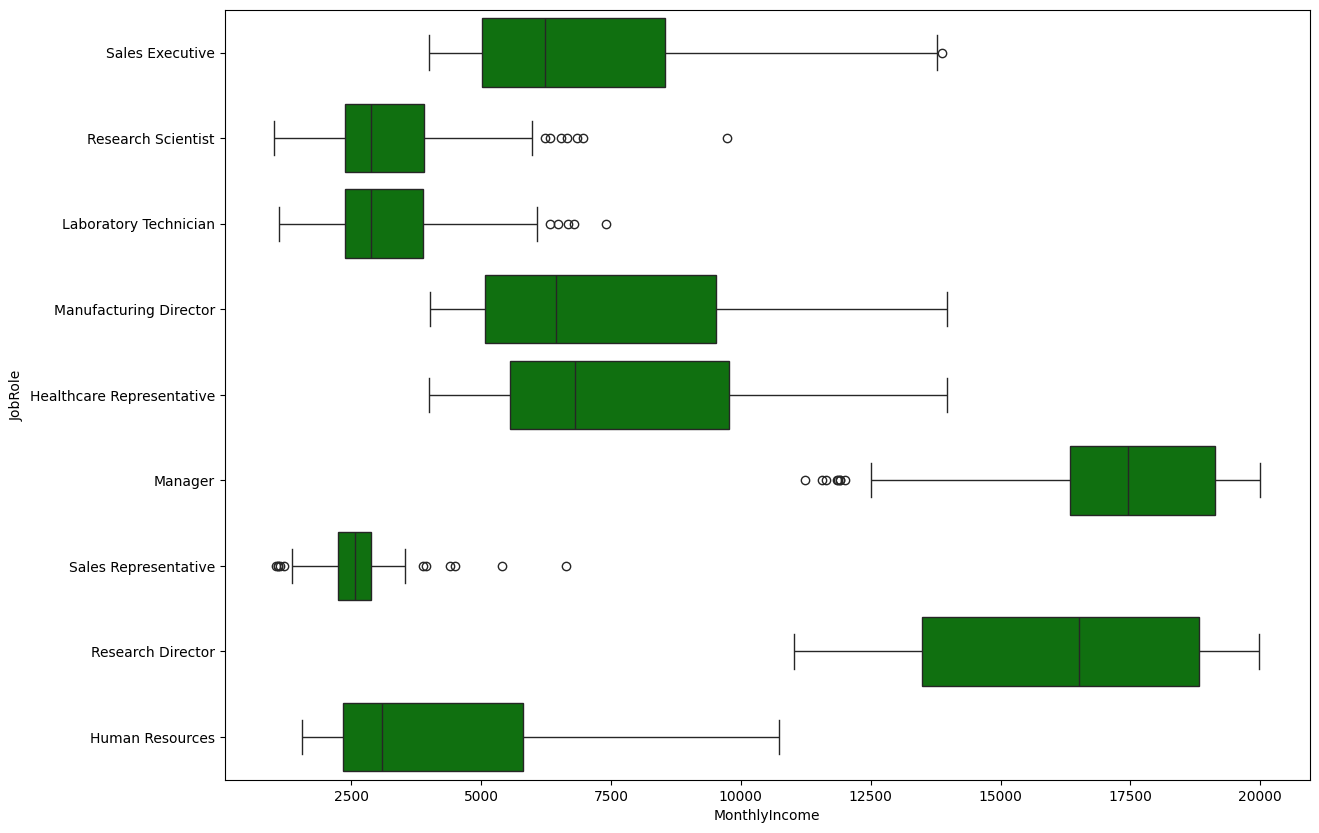

In [ ]:
#### Plot the boxplot between MonthlyIncome vs. JobRole
plt.figure(figsize=(14,10))
sns.boxplot(data = employee_df, x='MonthlyIncome', y='JobRole', color='g')

In [ ]:
###### Lets divide the data based on the attrition
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

print(f'Count of working employees & columns  : {stayed_df.shape}')
print(f'Count of employees left & columns  : {left_df.shape}')

Count of working employees & columns  : (1233, 31)
Count of employees left & columns  : (237, 31)


In [ ]:
left_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3


<ipython-input-46-d813c3e04d6e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
<ipython-input-46-d813c3e04d6e>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who stayed', shade = True, color = 'g')


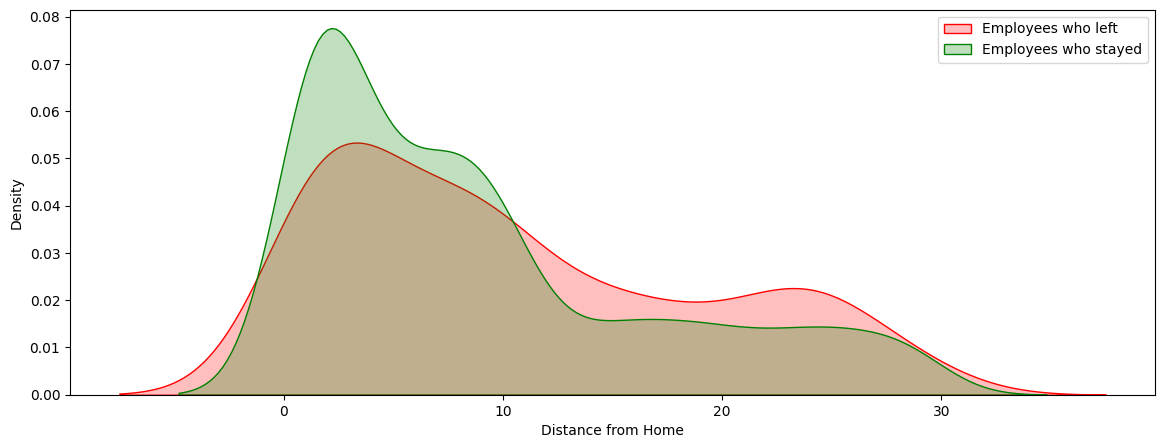

In [ ]:
##### Kernel Density Estimate (KDE) is a non-parametric way to estimate the probability density function of a random variable
##### KDE is useful for visualizing the distribution of data without assuming it follows any specific parametric distribution
##### KDE for the DistanceFromHome
plt.figure(figsize=(14,5))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who stayed', shade = True, color = 'g')

plt.xlabel('Distance from Home')
plt.ylabel('Density')
plt.legend()

<ipython-input-47-51a01722bba8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
<ipython-input-47-51a01722bba8>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stayed', shade = True, color = 'g')


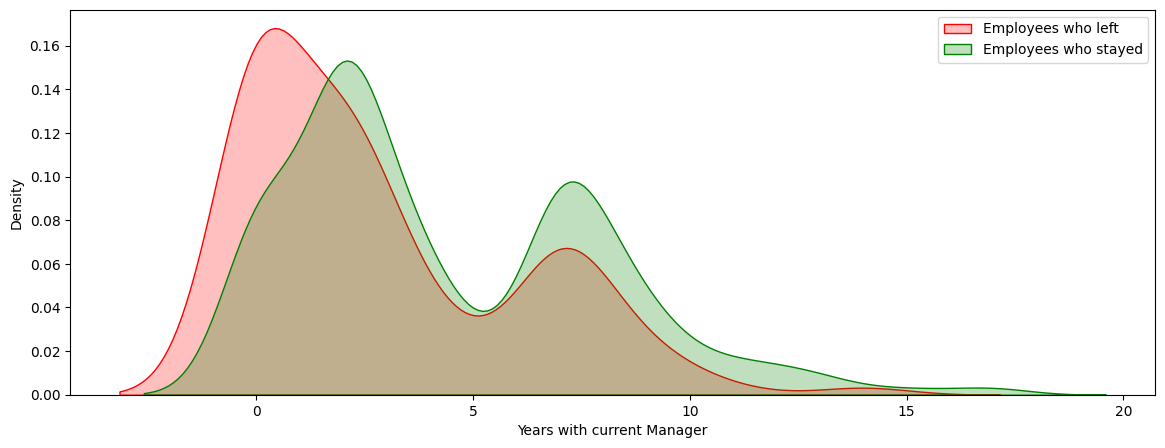

In [ ]:
##### KDE for the YearWithCurrManager
plt.figure(figsize=(14,5))
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stayed', shade = True, color = 'g')

plt.xlabel('Years with current Manager')
plt.ylabel('Density')
plt.legend()

<ipython-input-48-64f3baa68c12>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
<ipython-input-48-64f3baa68c12>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stayed', shade = True, color = 'g')


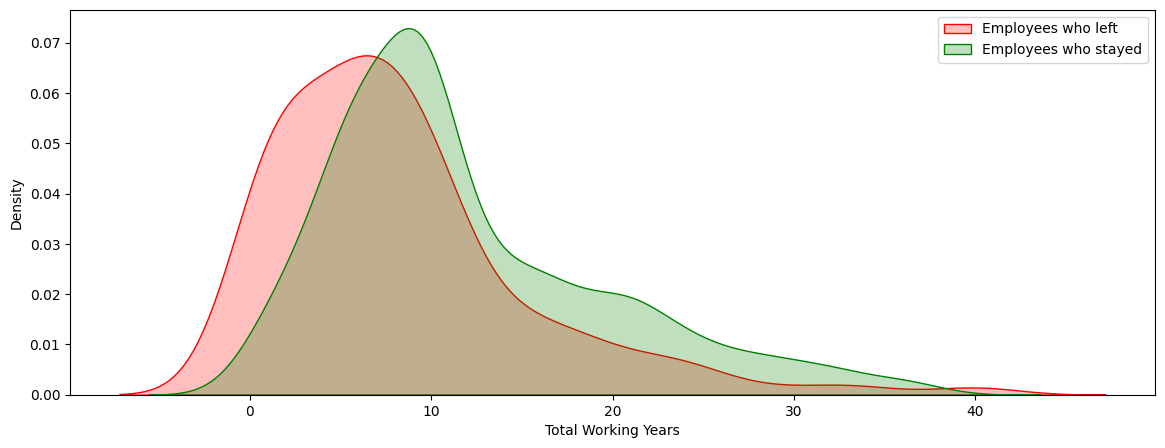

In [ ]:
##### KDE for the TotalWorkingYears
plt.figure(figsize=(14,5))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stayed', shade = True, color = 'g')

plt.xlabel('Total Working Years')
plt.ylabel('Density')
plt.legend()

In [ ]:
##### Moving the Attrition (Target Variable) to the last position in your DataFrame
target_column = employee_df.pop('Attrition')               # takes out the 'Attrition' column and saves it in target_column
employee_df['Attrition'] = target_column                   # adds 'Attrition' back to the table as the last column

employee_df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


#### Feature Engineering
1. Encoding categorical variables

In [ ]:
##### Select categorical variables
categorical_df = employee_df.select_dtypes(include=['object'])
categorical_df.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [ ]:
##### Encoding categorical variables is a technique used to convert categorical data into a format that can be provided to machine learning algorithms to improve model performance
##### One-hot encoding creates binary columns for each category and assigns 1 or 0 based on the presence of the category
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
categorical_df = pd.DataFrame(onehotencoder.fit_transform(categorical_df).toarray())
categorical_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
##### Dropping the target variable 'Attribution' from numerical variables
numerical_df.head()
numerical_df = numerical_df.drop(['Attrition'], axis=1)
numerical_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
print(numerical_df.shape)
print(categorical_df.shape)

(1470, 24)
(1470, 26)


In [ ]:
##### Combine numerical and encoded categorical variables
X_all = pd.concat([numerical_df, categorical_df], axis=1)

print(X_all.shape)
X_all.head()

(1470, 50)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,16,17,18,19,20,21,22,23,24,25
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


2. Normalizing numerical variables



In [ ]:
##### Feature scaling transform numerical features so they fit within a specific scale or range, helps to ensure that each feature contributes proportionately to the model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_all.columns = X_all.columns.astype(str)                                       # Convert all column names to strings
X = pd.DataFrame(scaler.fit_transform(X_all), columns=X_all.columns)

print(X.shape)
X.head()

(1470, 50)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,16,17,18,19,20,21,22,23,24,25
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y = employee_df['Attrition']

print(y.shape)
y.head()

(1470,)


,Attrition
0,1
1,0
2,1
3,0
4,0


#### Model Development & Training

In [ ]:
##### Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss

In [ ]:
##### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

##### Create a logistic regression object
model=LogisticRegression()

##### Train the model using the training set
model.fit(X_train, y_train)

##### Make predictions using the testing set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#### Model Evaluation

In [ ]:
##### Accuracy Score measures the proportion of correctly predicted outcomes (both positives and negatives) out of the total predictions
acc_score = 100 * accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

Accuracy Score: 88.32%


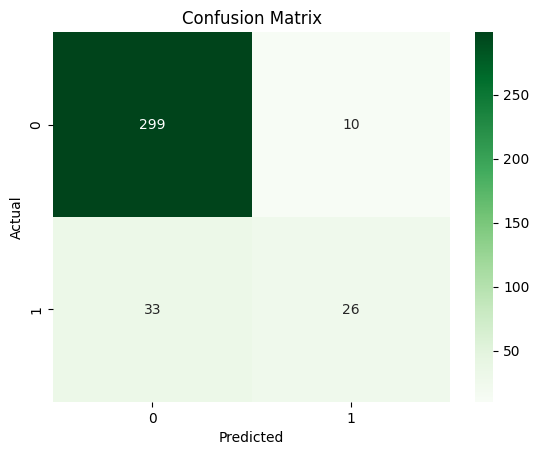

In [ ]:
##### Confusion Matrix summarizes predictions with counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
##### Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       309
           1       0.72      0.44      0.55        59

    accuracy                           0.88       368
   macro avg       0.81      0.70      0.74       368
weighted avg       0.87      0.88      0.87       368



ROC-AUC: 0.84


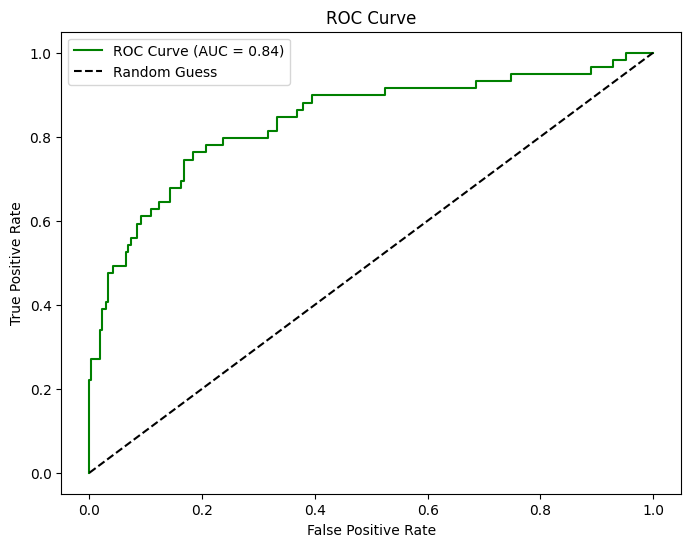

In [ ]:
##### ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# ##### Log-Loss
# log_loss_value = log_loss(y_test, y_pred_prob)
# print(f"Log-Loss: {log_loss_value:.2f}")

Log-Loss: 0.32
